In [2]:
# standard libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
!pip install yolov5
import yolov5
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.1

In [3]:
meta_file= '/content/metadata.csv'
IMAGE_PATH = '/content/Images/'

# load meta
df = pd.read_csv(meta_file)

# adding new column = filepath (complete image path)
df['filepath'] = df['filename'].map(lambda x:  os.path.join(IMAGE_PATH,x))

# mapping dictionary
labelmap = {}
for l in df.label.unique().tolist():
    if l == 1:
        labelmap[l] = 'dirty'
    else:
        labelmap[l] = 'clean'

# seperate list of image that are labelled = dirty
df_dirty = df[df['label'] == 1]
df_dirty.reset_index(drop=True, inplace=True)

# view
print(f"Found {df.groupby('label').count()['filename'][1]} images that are labelled = dirty and {df.groupby('label').count()['filename'][0]} that are labelled = clean")

Found 124 images that are labelled = dirty and 113 that are labelled = clean


In [4]:
model = yolov5.load('keremberke/yolov5m-garbage')

# model params
model.conf = 0.1
model.iou = 0.1
model.agnostic = True
model.multi_label = False
model.max_det = 5  # maximum number of detections per image

config.json:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/42.3M [00:00<?, ?B/s]

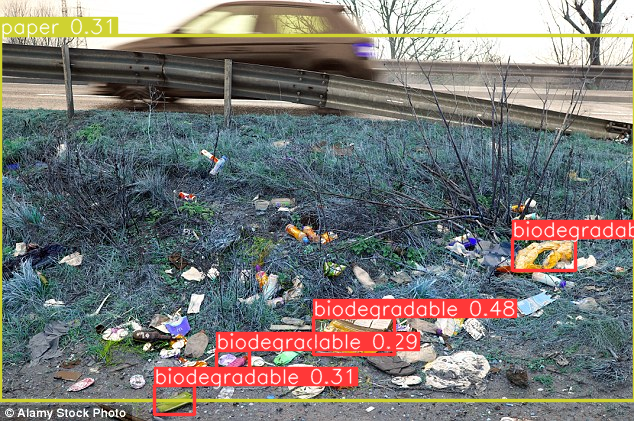

In [17]:
import cv2
# Suponiendo que 'df_dirty' es tu dataframe y contiene la columna 'filepath'
rand_img_path = random.choice(df_dirty['filepath'])

# Cargar la imagen usando OpenCV
img = cv2.imread(rand_img_path)

# Asegúrate de que la imagen no sea de solo lectura
img = img.copy()

# Realizar la inferencia
results = model(img, size=640)

# Inferencia con test time augmentation
results = model(img, augment=True)

# Parsear los resultados
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2 (corregido índice de columna)
scores = predictions[:, 4]
categories = predictions[:, 5]
# show detection bounding boxes on image
results.show()

